## Observations and Insights

## Dependencies and starter code

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
#
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
#
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#
# Combine the data into a single dataset
cancer_mice = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

## Summary statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
grouped_cm = cancer_mice.groupby(['Drug Regimen'])
#creating statistics
mean_df = grouped_cm.mean().round(2)
median_df = grouped_cm.median().round(2)
varience_df = grouped_cm.var().round(2)
stnd_df = grouped_cm.std().round(2)
sem_df = grouped_cm.sem().round(2)
#creating data frames
mn = mean_df['Tumor Volume (mm3)']
md = median_df['Tumor Volume (mm3)']
vd = varience_df['Tumor Volume (mm3)']
sd = stnd_df['Tumor Volume (mm3)']
sm = sem_df['Tumor Volume (mm3)']
#further creating data frames
summ_stat0 = pd.DataFrame(mn)
summ_stat1 = pd.DataFrame(md)
summ_stat2 = pd.DataFrame(vd)
summ_stat3 = pd.DataFrame(sd)
summ_stat4 = pd.DataFrame(sm)
#creating summary stats table 
summary_stats0 = pd.merge(summ_stat0, summ_stat1, on='Drug Regimen')
summary_stats1 = pd.merge(summary_stats0, summ_stat2, on='Drug Regimen')
summary_stats2 = pd.merge(summary_stats1, summ_stat3, on='Drug Regimen')
summary_stats3 = pd.merge(summary_stats2, summ_stat4, on='Drug Regimen')
summary_stats3.columns = ['Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)', 'Varience of Tumor Volume (mm3)',
                          'Standard Deviation of Tumor Volume (mm3)', 'Standard Error of the Mean of Tumor Volume (mm3)']
summary_stats3.head(10)
#summary


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Varience of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

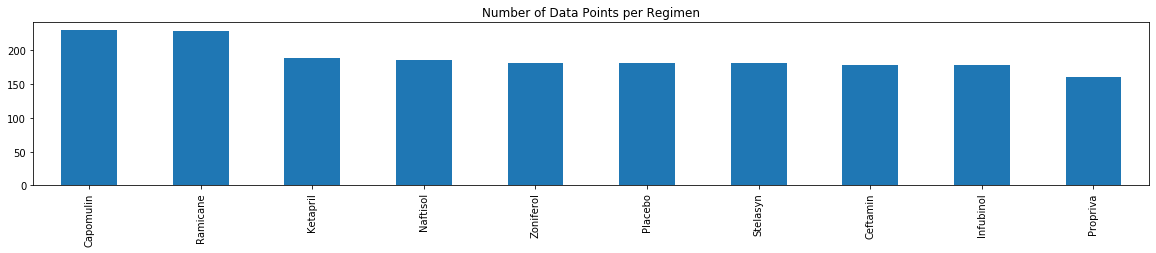

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#creating drug regimen object
new_count = cancer_mice['Drug Regimen'].value_counts()
#creating data frame from object
new_count_df = pd.DataFrame(new_count)
#plotting with object as x_axis object
new_count.plot(kind="bar", figsize=(20,3))
#naming graph
plt.title("Number of Data Points per Regimen")
#calling graph and defining layout
plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

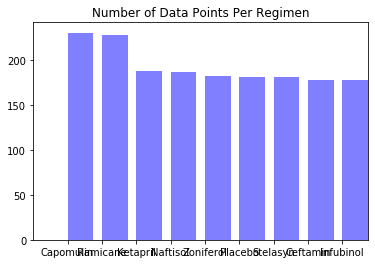

In [234]:
y_axis = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(y_axis))
# Give our chart some labels and a tile
plt.title("Number of Data Points Per Regimen")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol",
                            "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"])
plt.xlim(-1., len(x_axis)-1.25)
plt.bar(x_axis, y_axis, width=.75, color='b', alpha=0.5, align="edge")

#plt.tight_layout()
#plot(kind="bar", figsize=(20,3))

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

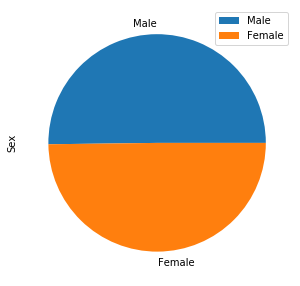

In [62]:
#creating pandas object
sex_counts = mouse_metadata['Sex'].value_counts()
sex_counts_df = pd.DataFrame(sex_counts)
#plotting the chart from out pandas object
plot = sex_counts_df.plot.pie(y='Sex', figsize=(5, 5))

In [17]:
#fetching values to load into pyplot pie chart
mouse_metadata['Sex'].value_counts()

Male      125
Female    124
Name: Sex, dtype: int64

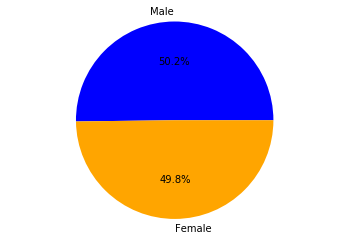

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Labels for the sections of pie chart
labels = ["Male", "Female"]
#
#setting values of each section of pie chart
sizes = [125, 124]
#
#setting colors of each section of the pie chart
colors = ["blue", "orange"]
#telling it not to explode
explode = (0, 0) 
#plotting and showing chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen